In [1]:
import numpy as np
def change_dp(coins):
    coins = sorted(coins)
    values = [100] * 100
    values[0] = 0
    for i in range(1, 100):
        for coin in coins:
            prev_index = i - coin
            if prev_index < 0:
                continue
            this_way = values[prev_index] + 1
            values[i] = min(this_way, values[i])
    return values[1:] # 0 isn't in the range

In [2]:
lookups = {}
for i in range(2, 100):
    for j in range(i+1, 100):
        for k in range(j+1, 100):
            change = [1, i, j, k]
            lookups[tuple(change)] = change_dp(change)
            

In [3]:
kvs = [(k,v) for k,v in lookups.items()]
kvs = sorted(kvs, key=lambda x: np.max(x[1]))
kvs = sorted(kvs, key=lambda x: np.sum(x[1]))

In [4]:
print("Best Currency: %s" % str(kvs[0][0]))
print("Expected Number Of Coins Returned: %s" % np.mean(kvs[0][1]))
print("Max Number of Coins Returned: %s" % np.max(kvs[0][1]))

Best Currency: (1, 5, 18, 29)
Expected Number Of Coins Returned: 3.9292929292929295
Max Number of Coins Returned: 6


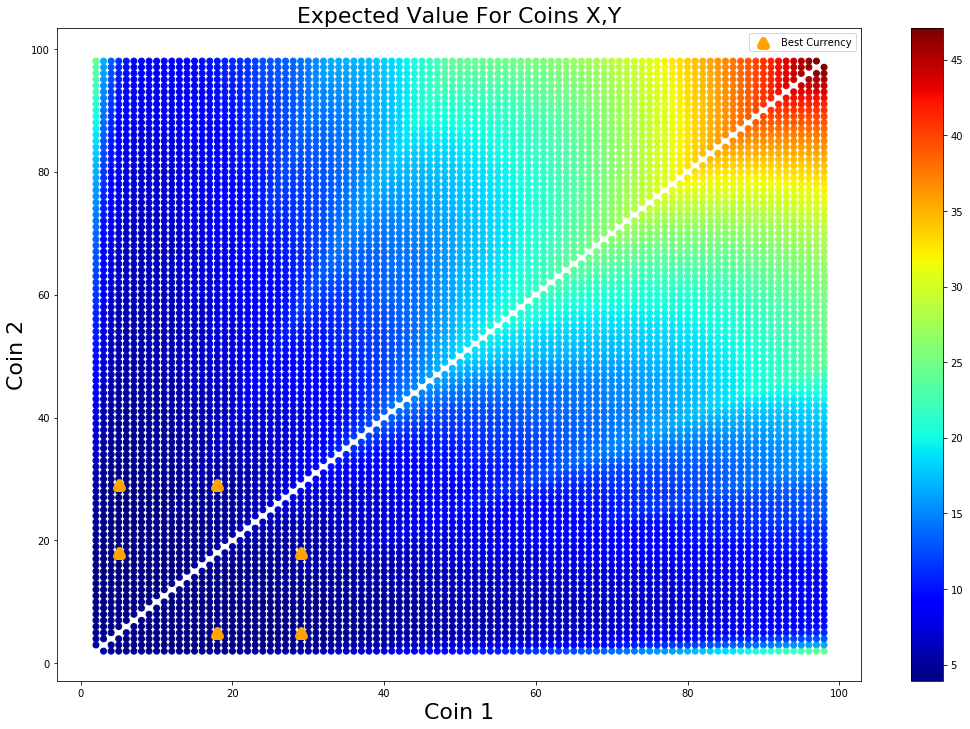

In [52]:
# Lets look at expected value for different coin values
# We HAVE to use a penny so disregard that
# Pick the optimal final coin for any two coins
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
best_xys = {}
for k,v in kvs:
    _,x,y,z = k
    v = np.mean(v)
    if (x,y) not in best_xys:
        best_xys[(x,y)] = v
    best_xys[(x,y)] = min(v, best_xys[(x,y)])
X,Y,V = [],[],[]
color_picks = []
for k,v in best_xys.items():
    x,y = k
    X.append(x)
    Y.append(y)
    V.append(v)
    
fig = plt.figure(figsize=(18,12))
scat = plt.scatter(Y,X,c=V,cmap=cm.jet)
scat = plt.scatter(X,Y,c=V,cmap=cm.jet)
best = plt.scatter([18,5,5,29,29,18],[5,18,29,5,18,29], color='orange', marker='^', linewidth=7)
fig.colorbar(scat)
plt.title("Expected Value For Coins X,Y", fontsize=22)
plt.xlabel("Coin 1", fontsize=22)
plt.ylabel("Coin 2", fontsize=22)
plt.legend([best],["Best Currency"])
plt.savefig('ev_coins.png', transparent=True)

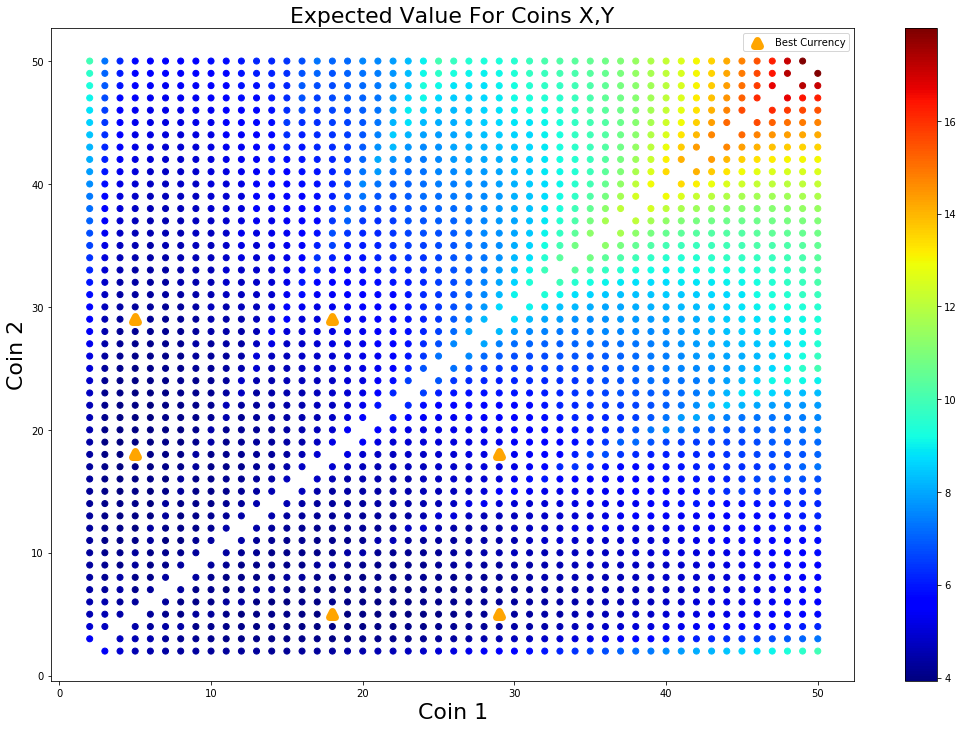

In [50]:
# Lets Zoom In to only Coins less than 50
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
best_xys = {}
for k,v in kvs:
    _,x,y,z = k
    if x > 50 or y > 50:
        continue
    v = np.mean(v)
    if (x,y) not in best_xys:
        best_xys[(x,y)] = v
    best_xys[(x,y)] = min(v, best_xys[(x,y)])
X,Y,V = [],[],[]
color_picks = []
for k,v in best_xys.items():
    x,y = k
    X.append(x)
    Y.append(y)
    V.append(v)
    
fig = plt.figure(figsize=(18,12))
scat = plt.scatter(Y,X,c=V,cmap=cm.jet)
scat = plt.scatter(X,Y,c=V,cmap=cm.jet)
best = plt.scatter([18,5],[5,18], color='orange', marker='^', linewidth=7)
fig.colorbar(scat)
plt.title("Expected Value For Coins X,Y", fontsize=22)
plt.xlabel("Coin 1", fontsize=22)
plt.ylabel("Coin 2", fontsize=22)
plt.legend([best],["Best Currency"])
plt.savefig('ev_coins_zoomed.png', transparent=True)

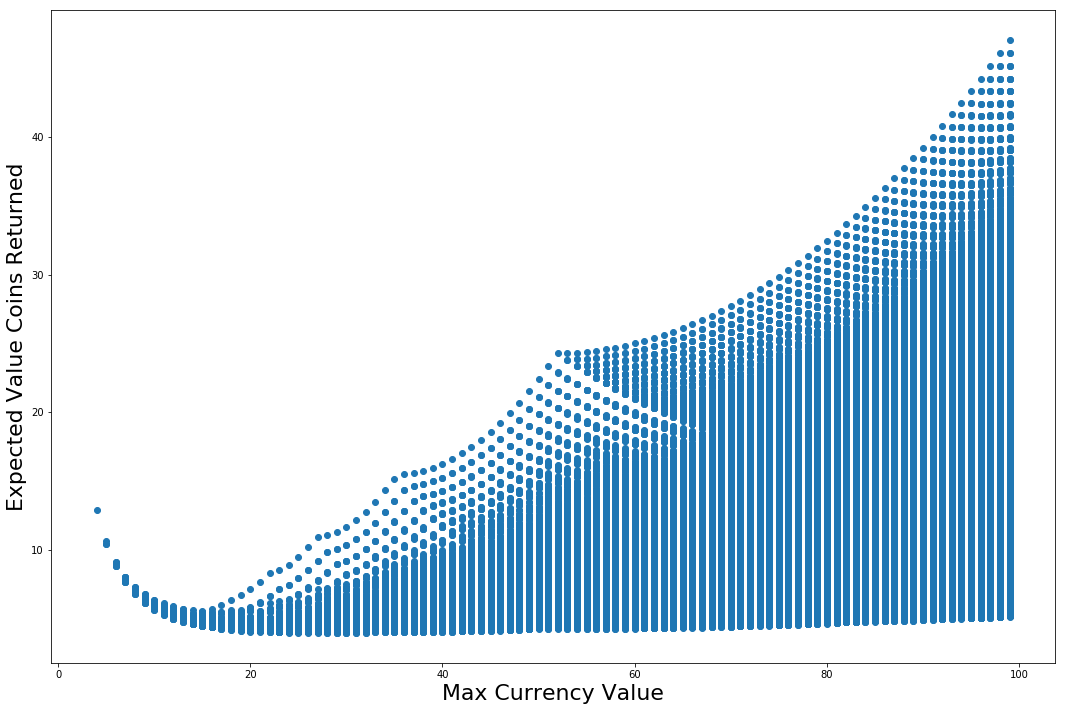

In [43]:
# Lets look at expected value for different largest coin values
evs = [np.mean(x[1]) for x in kvs]
max_coin_value = [np.max(x[0]) for x in kvs]
plt.figure(figsize=(18,12))
plt.scatter(max_coin_value, evs)
plt.ylabel("Expected Value Coins Returned", fontsize=22)
plt.xlabel("Max Currency Value", fontsize=22)
plt.savefig('ev_vs_max.png', transparent=True)

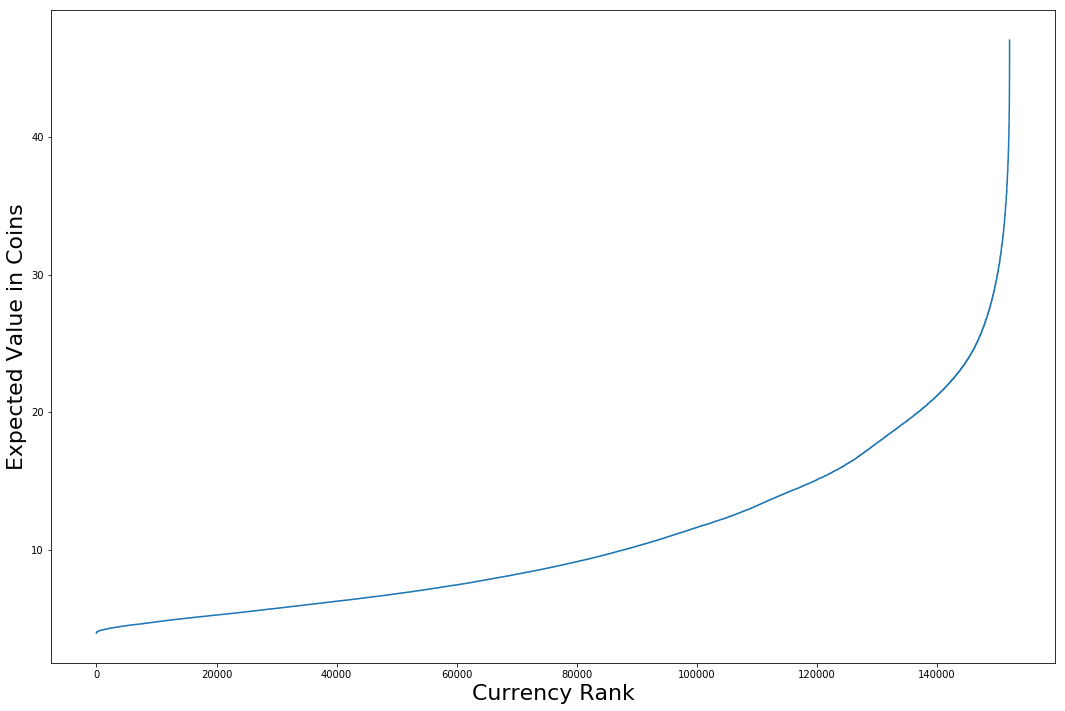

In [44]:
# Lets see how expected value returned shifts with currency rank.
# At a certain point the currencies are just bad and shoot up

ranks = list(range(len(kvs)))
plt.figure(figsize=(18,12))
plt.plot(ranks, evs)
plt.ylabel("Expected Value in Coins", fontsize=22)
plt.xlabel("Currency Rank", fontsize=22)
plt.savefig("ev_vs_rank.png", transparent=True)

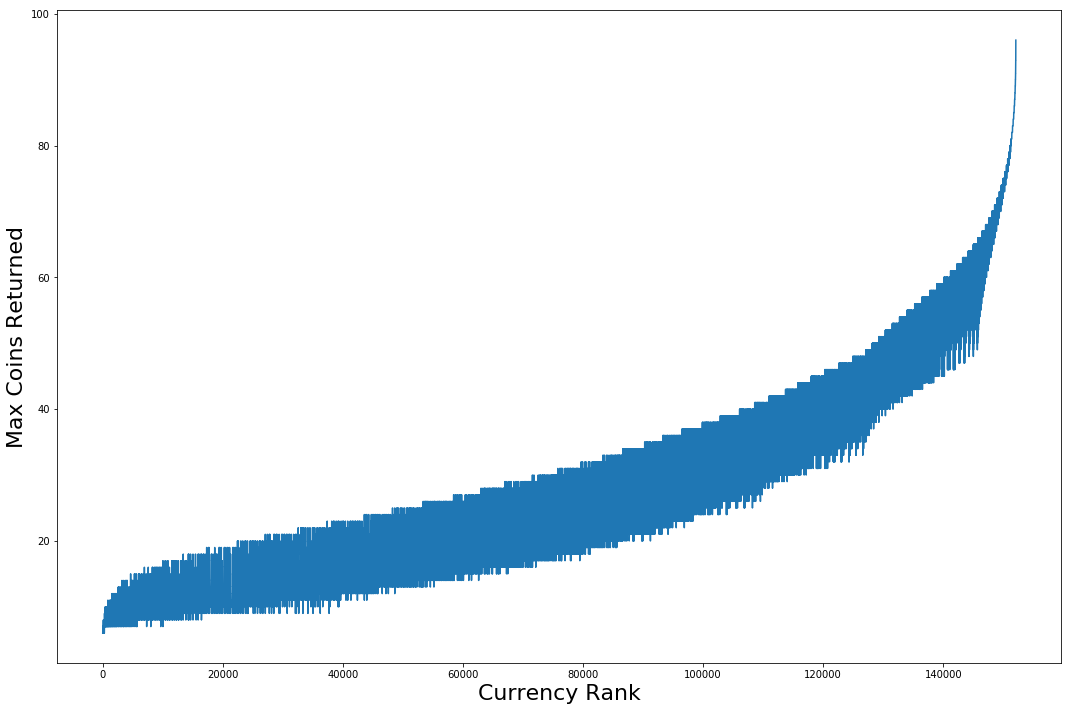

In [45]:
# Lets see how max coins returned shifts with currency rank.
# The function seems to shoot up in the same way
# interesting that max coins is so different for similar expected values
max_coins = [np.max(x[1]) for x in kvs]
plt.figure(figsize=(18,12))
plt.plot(ranks, max_coins)
plt.ylabel("Max Coins Returned", fontsize=22)
plt.xlabel("Currency Rank", fontsize=22)
plt.savefig("max_vs_rank", transparent=True)

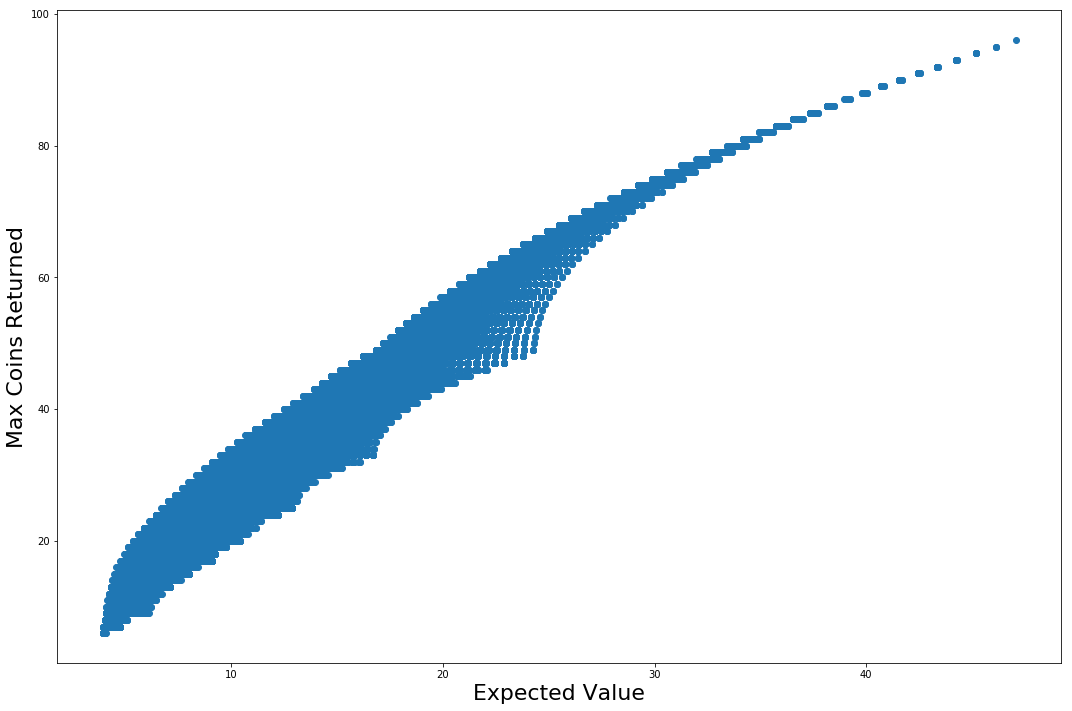

In [46]:
# Lets view max coins with respect to expected value
# We have some interesting arcs which I think show a coin value
# getting closer and closer to an exact multiple decreasing the max
max_coins = [np.max(x[1]) for x in kvs]
plt.figure(figsize=(18,12))
plt.scatter(evs, max_coins)
plt.ylabel("Max Coins Returned", fontsize=22)
plt.xlabel("Expected Value", fontsize=22)
plt.savefig("max_vs_ev.png", transparent=True)